In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def get_points(batch_size, n_steps, resolution):
    points = []
    starting = np.random.rand(batch_size, 1)
    for i in range(n_steps):
        points.append(starting + (i * resolution))
    return np.asarray(points).reshape(-1, n_steps, 1)

In [3]:
def get_gradients(x, n_steps):
    x_reshaped = x.reshape(-1)
    gradients = []
    grad = np.cos(x_reshaped) #derivative of sine
    for g in grad:
        if g > 0:
            gradients.append(1)
        else:
            gradients.append(0)
    return np.asarray(gradients).reshape(-1, n_steps, 1)

In [4]:
n_steps = 200
n_neurons = 100
resolution = 0.1
n_outputs = 1
n_inputs = 3

In [5]:
X = tf.placeholder(dtype=tf.float32, shape=[None, n_steps, n_inputs])
y = tf.placeholder(dtype=tf.float32, shape=[None, n_steps, n_outputs])

In [6]:
cell = tf.contrib.rnn.OutputProjectionWrapper(
    tf.nn.rnn_cell.BasicRNNCell(num_units=n_neurons, activation=tf.nn.elu),
    output_size=n_outputs)

outputs, states = tf.nn.dynamic_rnn(cell, X, dtype=tf.float32)


For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
If you depend on functionality not listed there, please file an issue.

Instructions for updating:
This class is equivalent as tf.keras.layers.SimpleRNNCell, and will be replaced by that in Tensorflow 2.0.
Instructions for updating:
Please use `keras.layers.RNN(cell)`, which is equivalent to this API
Instructions for updating:
Colocations handled automatically by placer.


In [7]:
learning_rate = 0.001
loss = tf.reduce_mean(tf.square(outputs - y))

In [8]:
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate)
training_op = optimizer.minimize(loss)

In [9]:
init = tf.global_variables_initializer()

In [10]:
saver = tf.train.Saver()

In [11]:
n_iterations = 1500
batch_size = 50

with tf.Session() as sess:
    init.run()
    for i in range(n_iterations):
        
        X_values = get_points(batch_size, n_steps, resolution)
        gradients = get_gradients(X_values, n_steps)
        cycle = X_values % 2*np.pi
        X_batch = np.concatenate((X_values, gradients, cycle), axis=2)#combine the 3 inputs into a single matrix
        
        y_batch = np.sin(X_values)
        
        sess.run(training_op, feed_dict={X: X_batch, y: y_batch})
        if i % 100 == 0:
            mse = loss.eval(feed_dict={X: X_batch, y: y_batch})
            print(mse)
    saver.save(sess, "./sin-three-inputs-x-axis-model")

0.71436787
0.37469295
0.34245306
0.28545418
0.2551255
0.22085705
0.21345451
0.06166699
0.052666858
0.05614541
0.05669469
0.050923236
0.055909965
0.052797254
0.04720338


Instructions for updating:
Use standard file APIs to check for files with this prefix.
INFO:tensorflow:Restoring parameters from ./sin-three-inputs-x-axis-model


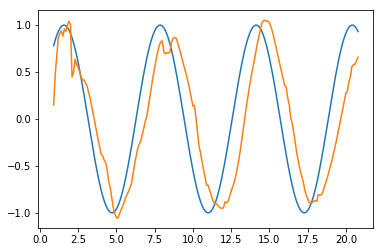

In [12]:
with tf.Session() as sess:
    saver.restore(sess, "./sin-three-inputs-x-axis-model")
    points = get_points(1, n_steps, resolution)
    gradients = get_gradients(points, n_steps)
    cycle = points % 2*np.pi
    X_batch = np.concatenate((points, gradients, cycle), axis=2)
    
    actual = np.sin(points) 
    
    y_pred = sess.run(outputs, feed_dict={X: X_batch})
    plt.plot(points.reshape(-1), actual.reshape(-1))
    plt.plot(points.reshape(-1), y_pred.reshape(-1))

INFO:tensorflow:Restoring parameters from ./sin-three-inputs-x-axis-model


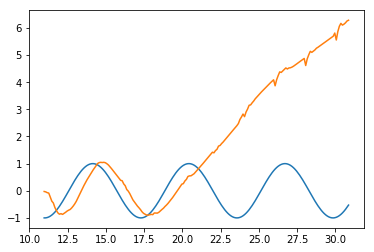

In [13]:
#creative RNN over 100 steps
with tf.Session() as sess:
    saver.restore(sess, "./sin-three-inputs-x-axis-model")
    points = get_points(1, n_steps+100, resolution)[:, -n_steps:]
    gradients = get_gradients(points, n_steps)
    cycle = points % 2*np.pi
    X_batch = np.concatenate((points, gradients, cycle), axis=2)
    
    actual = np.sin(points) 
    
    y_pred = sess.run(outputs, feed_dict={X: X_batch})
    plt.plot(points.reshape(-1), actual.reshape(-1))
    plt.plot(points.reshape(-1), y_pred.reshape(-1))